# PISCES wavelength calibration

We have PISCES VARIA calibration sets. We will show how to process them to build a new wavelength calibration

In [1]:
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

Import crispy-related stuff

In [3]:
import sys
codefolder = '../../../../crispy'
if codefolder not in sys.path: sys.path.append(codefolder)
import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('main')
from crispy.tools.image import Image
from crispy.PISCESparams import Params
codefolder = '../../../crispy'
par = Params(codefolder)

## Import files and subtract darks

In [4]:
VARIA_ON= glob.glob(par.wavecalDir+'IFS???nm.fits')
VARIA_OFF= glob.glob(par.wavecalDir+'IFSdark???nm.fits')
par.lamlist = []
par.filelist = []
for i in range(len(VARIA_ON)):
    img = Image(VARIA_ON[i]).data - Image(VARIA_OFF[i]).data
    par.lamlist += [float(VARIA_ON[i].split('/')[-1].split('nm')[0].split('IFS')[-1])]
    par.filelist += [par.wavecalDir+'det'+str(par.lamlist[i])+'.fits']
    Image(data=img).write(par.filelist[i])

crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFS605nm.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFSdark605nm.fits
crispy - INFO - Writing data to ../../../crispy/ReferenceFiles/Calibra_170306/det605.0.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFS615nm.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFSdark615nm.fits
crispy - INFO - Writing data to ../../../crispy/ReferenceFiles/Calibra_170306/det615.0.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFS625nm.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFSdark625nm.fits
crispy - INFO - Writing data to ../../../crispy/ReferenceFiles/Calibra_170306/det625.0.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFS635nm.fits
crispy - INF

crispy - INFO - Writing data to ../../../crispy/ReferenceFiles/Calibra_170306/det635.0.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFS645nm.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFSdark645nm.fits
crispy - INFO - Writing data to ../../../crispy/ReferenceFiles/Calibra_170306/det645.0.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFS655nm.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFSdark655nm.fits
crispy - INFO - Writing data to ../../../crispy/ReferenceFiles/Calibra_170306/det655.0.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFS665nm.fits
crispy - INFO - Read data from HDU 0 of ../../../crispy/ReferenceFiles/Calibra_170306/IFSdark665nm.fits
crispy - INFO - Writing data to ../../../crispy/ReferenceFiles/Calibra_170306/det665.0.fits
crispy - INFO - Read

Image the last file

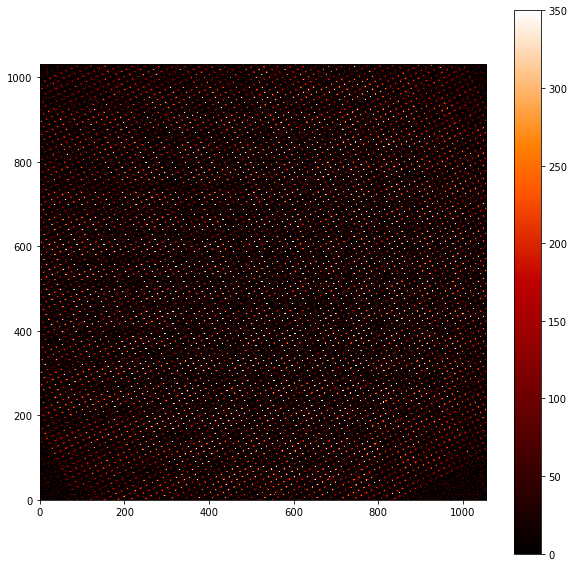

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(img,vmin=0, vmax=350, cmap='gist_heat')
plt.colorbar()
plt.show()

In [6]:
print(par.lamlist)

[605.0, 615.0, 625.0, 635.0, 645.0, 655.0, 665.0, 675.0, 685.0, 695.0, 705.0, 715.0, 725.0]


## Build wavelength calibration files

In [8]:
from crispy.tools.wavecal import buildcalibrations
buildcalibrations(par,
                  genwavelengthsol=True, # Compute wavelength at the center of all pixels
                  makehiresPSFlets=False) # do NOT make high-resolution PSFLets unless we have extremely good SNR

crispy - INFO - Building calibration files, placing results in ../../../crispy/ReferenceFiles/Calibra_170306/
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/Calibra_170306/det605.0.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/Calibra_170306/det605.0.fits
crispy - INFO - Initializing PSFlet location transformation coefficients
crispy - INFO - Performing initial optimization of PSFlet location transformation coefficients for frame ../../../crispy/ReferenceFiles/Calibra_170306/det605.0.fits
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ../../../crispy/ReferenceFiles/Calibra_170306/det605.0.fits
crispy - INFO - Read data from HDU 1 of ../../../crispy/ReferenceFiles/Calibra_170306/det615.0.fits
crispy - INFO - Initializing transformation coefficients with previous values
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ../../..